In [15]:
import json
import os

import numpy as np
import skimage.draw
import skimage.io
from matplotlib import pyplot as plt

In [2]:
import sys, glob, shutil
os.chdir(os.path.dirname(os.getcwd()))
os.getcwd()

'/Users/shubham/work/hurricane_damage_prediction'

In [9]:
damage_codes = {
    "un-classified": 1,
    "no-damage": 1,
    "minor-damage": 2,
    "major-damage": 3,
    "destroyed": 4,
}

In [5]:
image_dir = 'data/train_by_disaster/hurricane-harvey/images/'
label_dir = 'data/train_by_disaster/hurricane-harvey/labels/'
filename ='hurricane-harvey_00000000_post_disaster.json'

In [7]:
filename = os.path.join(label_dir, filename)

In [18]:
with open(filename, "r") as labels_file:
            label_json = json.load(labels_file)

            base = os.path.basename(filename).split(".")[0]
            image = skimage.io.imread(os.path.join(image_dir, base) + ".png")

            output = np.zeros((image.shape[0], image.shape[1]), dtype="uint8")
            for building in label_json["features"]["xy"]:
                print(building)
                point_strs = building["wkt"].replace("POLYGON ((", "").replace("))", "").split(",")
                print(point_strs)
                n = len(point_strs)
                polygon = np.empty((n, 2))
                for i in range(n):
                    polygon[i] = np.fromstring(point_strs[i], sep=" ")
                damage = damage_codes[building["properties"].get("subtype", "un-classified")]
                mask = damage * skimage.draw.polygon2mask(output.shape, polygon).astype("uint8").T
                output = np.maximum(output, mask)

{'properties': {'feature_type': 'building', 'subtype': 'major-damage', 'uid': 'c5549b70-5902-482a-9817-75dcc952a7be'}, 'wkt': 'POLYGON ((-3.347495692670991e-06 161.2752851126361, 7.528099895663007 161.0798877022621, 7.918894712858702 163.2292592143812, 14.36700924946582 162.8384643916391, 14.9532014755398 167.5280022356282, 17.8841626269114 167.9187970543818, 18.27495744903034 170.8497582079967, 15.73479111965304 171.826745256875, 16.51638075790825 179.0564494287455, 8.895881764167601 180.6196287097428, 9.091279172111093 186.4815510169725, 15.53939370716022 186.4815510169725, 15.3439962956022 197.6192033903391, 8.114292123419615 197.8146007997159, 7.918894711986228 206.2166894358242, -3.347807290520071e-06 206.2166894358242, -3.347495692670991e-06 161.2752851126361))'}
['-3.347495692670991e-06 161.2752851126361', ' 7.528099895663007 161.0798877022621', ' 7.918894712858702 163.2292592143812', ' 14.36700924946582 162.8384643916391', ' 14.9532014755398 167.5280022356282', ' 17.88416262691

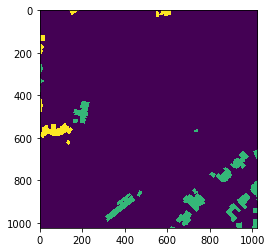

In [16]:
plt.imshow(output)

In [17]:
import geojson

ModuleNotFoundError: No module named 'geojson'

In [19]:
from osgeo import gdal, ogr

In [21]:
from osgeo import gdal, ogr
from PIL import Image
import numpy as np
import os


def create_poly_mask(rasterSrc, vectorSrc, npDistFileName='', 
							noDataValue=0, burn_values=1):

	'''
	Create polygon mask for rasterSrc,
	Similar to labeltools/createNPPixArray() in spacenet utilities
	'''
	
	## open source vector file that truth data
	source_ds = ogr.Open(vectorSrc)
	source_layer = source_ds.GetLayer()

	## extract data from src Raster File to be emulated
	## open raster file that is to be emulated
	srcRas_ds = gdal.Open(rasterSrc)
	cols = srcRas_ds.RasterXSize
	rows = srcRas_ds.RasterYSize

	if npDistFileName == '':
		dstPath = ".tmp.tiff"
	else:
		dstPath = npDistFileName

	## create First raster memory layer, units are pixels
	# Change output to geotiff instead of memory 
	memdrv = gdal.GetDriverByName('GTiff') 
	dst_ds = memdrv.Create(dstPath, cols, rows, 1, gdal.GDT_Byte, 
						   options=['COMPRESS=LZW'])
	dst_ds.SetGeoTransform(srcRas_ds.GetGeoTransform())
	dst_ds.SetProjection(srcRas_ds.GetProjection())
	band = dst_ds.GetRasterBand(1)
	band.SetNoDataValue(noDataValue)    
	gdal.RasterizeLayer(dst_ds, [1], source_layer, burn_values=[burn_values])
	dst_ds = 0

	mask_image = Image.open(dstPath)
	mask_image = np.array(mask_image)

	if npDistFileName == '':
		os.remove(dstPath)
		
	return mask_image

In [22]:
create_poly_mask("data/train_by_disaster/hurricane-harvey/labels/hurricane-harvey_00000000_pre_disaster.json", 
                "data/train_by_disaster/hurricane-harvey/masks/hurricane-harvey_00000000_pre_disaster.png")

AttributeError: 'NoneType' object has no attribute 'GetLayer'